### Tarea No. 4

## José Luis Hernández

#### El notebook aún lo tengo en proceso, falta agregarle comentarios a los resultados y procedimiento efectuado

In [1]:
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lg

In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
dfm = pd.read_csv('mushrooms_exploded.csv', sep=",")
dfm

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Verificando las variables categóricas

In [5]:
categoricas = [var for var in dfm.columns if dfm[var].dtype=='O']
print('Existen {} variables categóricas\n'.format(len(categoricas)))

print('Las cuales son:\n\n', categoricas)

Existen 23 variables categóricas

Las cuales son:

 ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [6]:
dfm.duplicated().sum()

0

<AxesSubplot:>

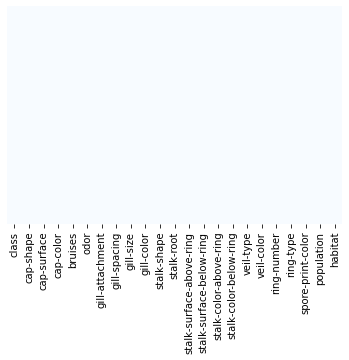

In [7]:
sns.heatmap(dfm.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

In [8]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Asignado las variables categoricas a X_cat

In [9]:
X_cat = dfm[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']]

## Convertimos las variables categoricas a valores numericos

In [10]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [11]:
X_cat.shape

(8124, 117)

In [12]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, 0 to 116
dtypes: float64(117)
memory usage: 7.3 MB


In [14]:
## Hacemos un escalamiento de variables para evitar que se infravaloren las variables con menores valores numericos 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_cat)

In [15]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y = dfm['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [ ]:
##  dfm['class'] = dfm['class'].apply(lambda x: 1 if x == 'e' else 0)

In [ ]:
##  y = dfm['class']
##  y

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [18]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
svc_model = svc()
knn_model = knc(n_neighbors=1)

In [20]:
svc_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
svc_prediction = svc_model.predict(x_test)
knn_prediction = knn_model.predict(x_test)

In [23]:
cm_svc=confusion_matrix(svc_prediction, y_test, labels=dfm['class'].unique())
print(accuracy_score(svc_prediction, y_test))
print(classification_report(svc_prediction, y_test))

1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       861
           p       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [22]:
cm_knn=confusion_matrix(knn_prediction, y_test, labels=dfm['class'].unique())
print(accuracy_score(knn_prediction, y_test))
print(classification_report(knn_prediction, y_test))

1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       861
           p       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [25]:
dfm['class'].unique()

array(['p', 'e'], dtype=object)

## Si pongo a correr la siguiente celda, nunca termina 

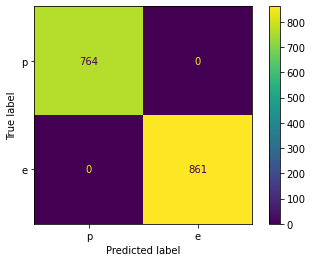

In [26]:
cm_knn=confusion_matrix(svc_prediction, y_test, labels=dfm['class'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=dfm['class'].unique())
disp.plot()

## y la siguiente celda me da error 

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

### Estoy estoy trantando ahora, pero no me convence la gráfica

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [28]:
clf = make_pipeline(StandardScaler(), svc(random_state=10))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=10))])

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

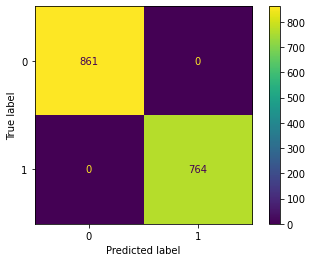

In [30]:
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()